# Gaussian Naive Bayes (GaussianNB)


In [1]:
import numpy as np
import pandas as pd

from scipy.stats import norm
from sklearn.datasets import make_blobs

from matplotlib import pyplot
import matplotlib.pyplot as plt

import matplotlib.cm as cm
from random import sample

## Generating Some Example Data with 2 Features

In [2]:
n_feature = 2 # the number of features
n_components = 2 # the number of clusters

n = 1000 # the number of total samples

In [3]:
# generate isotropic Gaussian blobs (data from mixture Gaussian distributions)
X, y = make_blobs(n_samples=n, # the number of total samples
                  centers=n_components, # the number of clusters
                  n_features=n_feature, # the number of features
                  cluster_std = [4] * n_components, # the std of each cluster
                  random_state=2) # 2

# X = np.hstack((np.ones((m, 1)), X))

X

array([[  1.9738175 ,  -7.50934555],
       [ -1.19505856,  -5.8378053 ],
       [  0.37631303, -13.57342824],
       ...,
       [ -0.8821049 , -19.09837957],
       [ -2.82660508, -13.01978618],
       [ -0.92520746,  -7.54158259]])

In [4]:
for i in range(5):
    print('x =', X[i, ], ', y =', y[i])

x = [ 1.9738175  -7.50934555] , y = 1
x = [-1.19505856 -5.8378053 ] , y = 0
x = [  0.37631303 -13.57342824] , y = 0
x = [-0.58648176 -0.37741265] , y = 1
x = [ 5.5126432  -1.76458642] , y = 1


In [5]:
# Just to show you what is inside it. We print the first 10 elements of this numpy array. 
y[:10]

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1])

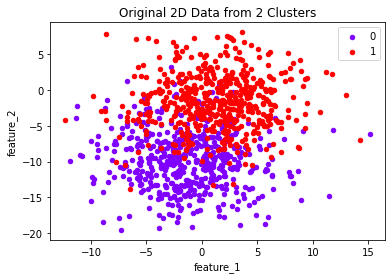

In [6]:
# scatter plot, data points annotated by different colors
df = pd.DataFrame(dict(feature_1=X[:,0], feature_2=X[:,1], label=y))


cluster_name = set(y)
colors = dict(zip(cluster_name, cm.rainbow(np.linspace(0, 1, len(cluster_name)))))
fig, ax = pyplot.subplots()

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2', label=key, color=colors[key].reshape(1,-1))
    
pyplot.title('Original 2D Data from {} Clusters'.format(n_components))
pyplot.show()

In [7]:

# Create Test/Train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Gaussian Naive Bayes (GaussianNB).

Can perform online updates to model parameters via partial_fit. 

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB


## See also

BernoulliNB

Naive Bayes classifier for multivariate Bernoulli models.

CategoricalNB

Naive Bayes classifier for categorical features.

ComplementNB

Complement Naive Bayes classifier.

MultinomialNB

Naive Bayes classifier for multinomial models.

In [8]:
import numpy as np

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)



GaussianNB()

In [9]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.875


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       104
           1       0.89      0.84      0.87        96

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



# Partial Fit

Gaussian Naive Bayes (GaussianNB).

Can perform online updates to model parameters via partial_fit. 

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB



In [11]:
model = GaussianNB()
model.partial_fit(X_train, y_train, np.unique(y_train))

GaussianNB()

In [12]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.875


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       104
           1       0.89      0.84      0.87        96

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200

